# Sangam 2019 ML hackathon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [55]:
train_data = pd.read_csv('./Competiton DataSets/competition_Train.csv')

In [56]:
train_data.head(20)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918
5,2012-10-02 14:00:00,None,23,65,3,328,6,6,291.72,0.0,0.0,1,Clear,sky is clear,5181
6,2012-10-02 15:00:00,None,184,64,3,328,7,7,293.17,0.0,0.0,1,Clear,sky is clear,5584
7,2012-10-02 16:00:00,None,167,64,3,327,7,7,293.86,0.0,0.0,1,Clear,sky is clear,6015
8,2012-10-02 17:00:00,None,119,63,3,327,6,6,294.14,0.0,0.0,20,Clouds,few clouds,5791
9,2012-10-02 18:00:00,None,161,63,3,326,3,3,293.10,0.0,0.0,20,Clouds,few clouds,4770


In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.9+ MB


In [58]:
# cleaning and removing excess coloumn
#< code here >
# removing non-significant coulumns and features
train_data_tril_1 = train_data.drop(['date_time','wind_direction','weather_description'], axis=1 )

In [59]:
train_data_tril_1.head(20)

,is_holiday,air_pollution_index,humidity,wind_speed,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,None,121,89,2,1,1,288.28,0.0,0.0,40,Clouds,5545
1,None,178,67,3,1,1,289.36,0.0,0.0,75,Clouds,4516
2,None,113,66,3,2,2,289.58,0.0,0.0,90,Clouds,4767
3,None,20,66,3,5,5,290.13,0.0,0.0,90,Clouds,5026
4,None,281,65,3,7,7,291.14,0.0,0.0,75,Clouds,4918
5,None,23,65,3,6,6,291.72,0.0,0.0,1,Clear,5181
6,None,184,64,3,7,7,293.17,0.0,0.0,1,Clear,5584
7,None,167,64,3,7,7,293.86,0.0,0.0,1,Clear,6015
8,None,119,63,3,6,6,294.14,0.0,0.0,20,Clouds,5791
9,None,161,63,3,3,3,293.10,0.0,0.0,20,Clouds,4770


In [111]:
train_data_1 = np.array(train_data_tril_1)

In [112]:
train_data_1.shape

(33750, 12)

In [113]:
X = train_data_1[:,:11]

In [114]:
print(X)


[[  7. 121.  89. ...   0.  40.   1.]
 [  7. 178.  67. ...   0.  75.   1.]
 [  7. 113.  66. ...   0.  90.   1.]
 ...
 [  7. 138.  70. ...   0.  90.   5.]
 [  7. 229.  66. ...   0.  90.   6.]
 [  7. 140.  63. ...   0.  90.   5.]]


In [108]:
np.unique(X[:,0])
# To classify as holiday or not holiday


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [109]:
# # To classify as holiday or not holiday

# for i in range (0,33750):
#     if X[i,0] is "None":
#         X[i,0]=0
#     if X[i,0] is not "None":
#         X[i,0] = 1

# for i in range (0,33750):
#     if X[i,0] == 7.0:
#         X[i,0] = 0
#     if X[i,0] != 7.0:
#         X[i,0] = 1
    

In [110]:
# np.unique(X[:,0]) # problem with binary label encoding

array([1.])

In [115]:
print(X.shape)

(33750, 11)


In [116]:
Y = train_data_1[:,11:]

In [117]:
print(Y)

[[5545.]
 [4516.]
 [4767.]
 ...
 [2194.]
 [1328.]
 [1328.]]


In [84]:
# plotting some data

In [118]:
X[:,2]

array([89., 67., 66., ..., 70., 66., 63.])

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


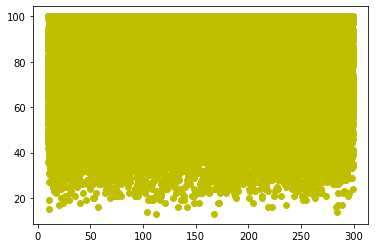

In [24]:
plt.scatter(X[:,2],X[:,3] ,c='Y')
#Incorrect way of visualization 

In [119]:
# normalising data
for i in range (0,11):
    X[:,i] = ( X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])



In [79]:
# X[:,2] = ( X[:,2]-np.mean(X[:,2]))/np.std(X[:,2])
# X[:,3] = ( X[:,3]-np.mean(X[:,3]))/np.std(X[:,3])
# X[:,4] = ( X[:,4]-np.mean(X[:,4]))/np.std(X[:,4])
# X[:,5] = ( X[:,5]-np.mean(X[:,5]))/np.std(X[:,5])
# X[:,1] = ( X[:,1]-np.mean(X[:,1]))/np.std(X[:,1])

In [80]:
print(X)

[[ 0.01424833 -0.40415257  1.05572004 ... -0.03254579 -0.26906286
  -0.55495428]
 [ 0.01424833  0.27657226 -0.2497631  ... -0.03254579  0.63134766
  -0.55495428]
 [ 0.01424833 -0.4996929  -0.30910324 ... -0.03254579  1.01723789
  -0.55495428]
 ...
 [ 0.01424833 -0.20112938 -0.07174267 ... -0.03254579  1.01723789
   0.90545171]
 [ 0.01424833  0.88564185 -0.30910324 ... -0.03254579  1.01723789
   1.27055321]
 [ 0.01424833 -0.17724429 -0.48712367 ... -0.03254579  1.01723789
   0.90545171]]


In [81]:
print(X.shape)

(33750, 11)


In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le = LabelEncoder()

In [88]:
train_data_tril_1['weather_type'] = le.fit_transform(train_data_tril_1['weather_type'])

In [89]:
train_data_tril_1['is_holiday']=le.fit_transform(train_data_tril_1['is_holiday'])

In [90]:
train_data_tril_1.head(20)

,is_holiday,air_pollution_index,humidity,wind_speed,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,7,121,89,2,1,1,288.28,0.0,0.0,40,1,5545
1,7,178,67,3,1,1,289.36,0.0,0.0,75,1,4516
2,7,113,66,3,2,2,289.58,0.0,0.0,90,1,4767
3,7,20,66,3,5,5,290.13,0.0,0.0,90,1,5026
4,7,281,65,3,7,7,291.14,0.0,0.0,75,1,4918
5,7,23,65,3,6,6,291.72,0.0,0.0,1,0,5181
6,7,184,64,3,7,7,293.17,0.0,0.0,1,0,5584
7,7,167,64,3,7,7,293.86,0.0,0.0,1,0,6015
8,7,119,63,3,6,6,294.14,0.0,0.0,20,1,5791
9,7,161,63,3,3,3,293.10,0.0,0.0,20,1,4770


# again repeating steps of array conversion and normalising

# Normalising

In [120]:
print(X)

[[ 0.01424833 -0.40415257  1.05572004 ... -0.03254579 -0.26906286
  -0.55495428]
 [ 0.01424833  0.27657226 -0.2497631  ... -0.03254579  0.63134766
  -0.55495428]
 [ 0.01424833 -0.4996929  -0.30910324 ... -0.03254579  1.01723789
  -0.55495428]
 ...
 [ 0.01424833 -0.20112938 -0.07174267 ... -0.03254579  1.01723789
   0.90545171]
 [ 0.01424833  0.88564185 -0.30910324 ... -0.03254579  1.01723789
   1.27055321]
 [ 0.01424833 -0.17724429 -0.48712367 ... -0.03254579  1.01723789
   0.90545171]]


In [121]:
print(Y)

[[5545.]
 [4516.]
 [4767.]
 ...
 [2194.]
 [1328.]
 [1328.]]


In [122]:
print(X.shape)

(33750, 11)


In [123]:
print(Y.shape)

(33750, 1)


# visualisation

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# # for i in range(0,11):
# sns.heatmap(X)
#     # heatmap needed

# Algorithm application: Locally Weighted Linear regression

# FROM SCRATCH......CHANGE QUERY POINT AFTER VISUALIZATION

In [125]:
#try using scratch and tune hyper parameter for increased accuracy

In [127]:
# try using XGboost

Refrence https://scikit-learn.org/stable/modules/linear_model.html

In [128]:
# Applyting data on cleaned and normalised data......try with unnormalised data X

In [131]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x  = query_point
        W[i,i] =  np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [132]:
# making Weight matrix
X1 = np.mat(X)
Y1 = np.mat(Y)
M = X.shape[0]

W = getW(-1,X,100)
print(W.shape)
print(W)

(33750, 33750)
[[0.99942122 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99939314 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99942103 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.9992467  0.         0.        ]
 [0.         0.         0.         ... 0.         0.99889372 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99884727]]


In [133]:
# making predictions
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred
    

In [147]:
print(X[:,0].shape)
print(Y.shape)
X_cropped = X[:,i]
print(X_cropped.shape)

(33750,)
(33750, 1)
(33750,)


In [144]:
theta_list =[]
pred_list = []
X_cropped = np.zeros((33750,1))

In [145]:
for i in range (12):
    X_cropped = X[:,i]
    theta,pred = predict(X_cropped,Y,1,1)
    theta_list.append(theta)
    pred_list.append(pred)

ValueError: all the input arrays must have same number of dimensions

In [136]:
theta,pred = predict(X[:,0],Y,1.0,1.0)

ValueError: all the input arrays must have same number of dimensions